## **Escenario**
Eres un profesional de datos en ciernes y acabas de terminar de leer el Capítulo 2 del curso de Análisis exploratorio de datos. Deseas obtener más experiencia en el trazado de datos, así que decides descargar los datos meteorológicos de tu lugar de vacaciones favorito.

Visitas el sitio web ``https://www.ncei.noaa.gov/`` (materiales en inglés), el sitio de los Centros Nacionales de Información Ambiental, la Administración Nacional Oceánica y Atmosférica para obtener datos meteorológicos gratuitos.

En esta tarea ya hemos recopilado todos los datos necesarios en el archivo, así que no tienes que recoger datos para solventarla. Pero puedes encontrar los datos en el sitio web para practicar tu búsqueda de la información.

Encuentras tres estaciones meteorológicas cerca de tu destino de vacaciones: una en la costa, una en el interior y otra en las montañas. Te gustaría encontrar una época del año en la que puedas explorar estas tres regiones sin que haga demasiado calor o demasiado frío.

Tu objetivo es visualizar y comparar los datos meteorológicos en estas tres ubicaciones. Quieres encontrar la época del año en que la temperatura media en todas las ubicaciones es superior a 55 grados e inferior a 85 grados Fahrenheit.

En el archivo ``weather_data.csv``, encontrarás cinco columnas:
* ``station`` — nombre de la estación (estación costera ``CT_34A5``, estación interior ``IN_44B4``, estación de montaña ``MT_87AB``)
* ``DATE`` —tiempo de medición, abarca 1 año
* ``tavg ``— temperatura media diaria
* ``tmax`` — temperatura máxima diaria
* ``tmin`` — temperatura mínima diaria

¡Encontremos la época con la temperatura ideal para que puedas planificar tus vacaciones!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
weather = pd.read_csv('weather_data.csv', sep=',')

# imprime las primeras 5 filas
print(weather.head())
print()
# imprime las últimas 5 filas
print(weather.tail())
print()
# imprime la información general
print(weather.info())
# imprime el tamaño del conjunto de datos (solo el número de filas y columnas)
print(weather.shape)
# imprime la suma de los valores ausentes por columna
weather.isnull().sum()

   station              DATE   tavg   tmax   tmin
0  CT_34A5  2019-01-01T00:00  43.99  51.98  35.54
1  CT_34A5  2019-01-01T01:00  43.14  51.72  35.70
2  CT_34A5  2019-01-01T02:00  43.16  52.11  35.29
3  CT_34A5  2019-01-01T03:00  42.93  52.39  35.13
4  CT_34A5  2019-01-01T04:00  42.99  52.06  35.16

       station              DATE   tavg   tmax   tmin
26275  MT_87AB  2019-12-31T19:00  53.45  67.19  32.27
26276  MT_87AB  2019-12-31T20:00  53.78  66.33  32.28
26277  MT_87AB  2019-12-31T21:00  53.41  66.46  31.86
26278  MT_87AB  2019-12-31T22:00  53.37  65.45  31.81
26279  MT_87AB  2019-12-31T23:00  53.72  64.98  31.75

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  26280 non-null  object 
 1   DATE     26280 non-null  object 
 2   tavg     26280 non-null  float64
 3   tmax     26280 non-null  float64
 4   tmin     26280 non-null  float64


station    0
DATE       0
tavg       0
tmax       0
tmin       0
dtype: int64

Observamos que hay 26280 filas y el mismo número de valores no nulos en cada columna, por lo tanto no hay valores nulos. DATE se leyó como tipo de objeto; esto significa que DATE no se leyó como fecha.

- Los valores de DATE aumentan por hora. El clima no cambia mucho de una hora a otra por lo que obviamente estos valores han sido interpolados (esto se refiere al proceso de tomar valores conocidos en ciertos intervalos y estimar los valores en subintervalos; por ejemplo, tomar valores diarios y estimar valores por hora).
- Contamos con 3 estaciones, 365 días en 2019 y 24 horas al día. Es por eso que hay 3 x 365 x 24 = 26 280 filas. 
- No hay valores ausentes. 
- El único problema es que DATE se cargó como una cadena.

Cambiamos DATE a una variable de fecha y hora y volvemos a mostrar la información general y las últimas 5 filas para verificar la conversión.

In [ ]:
weather['DATE'] = pd.to_datetime(weather['DATE'], format='%Y-%m-%dT%H:%M')

print(weather.info())
weather.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  26280 non-null  object        
 1   DATE     26280 non-null  datetime64[ns]
 2   tavg     26280 non-null  float64       
 3   tmax     26280 non-null  float64       
 4   tmin     26280 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.0+ MB
None


,station,DATE,tavg,tmax,tmin
26275,MT_87AB,2019-12-31 19:00:00,53.45,67.19,32.27
26276,MT_87AB,2019-12-31 20:00:00,53.78,66.33,32.28
26277,MT_87AB,2019-12-31 21:00:00,53.41,66.46,31.86
26278,MT_87AB,2019-12-31 22:00:00,53.37,65.45,31.81
26279,MT_87AB,2019-12-31 23:00:00,53.72,64.98,31.75


Vamos a observar la temperatura solo para la estación meteorológica del interior. Para ello:
1. Usamos ``query()`` para crear la variable ``inland`` seleccionando filas de ``weather``, donde ``station`` es igual a ``'IN_44B4'``.
2. Trazamos las variables de ``temperatura`` (tmin, tavg y tmax) en ``inland`` contra ``DATE``. 

8760    IN_44B4
8761    IN_44B4
8762    IN_44B4
8763    IN_44B4
8764    IN_44B4
Name: station, dtype: object


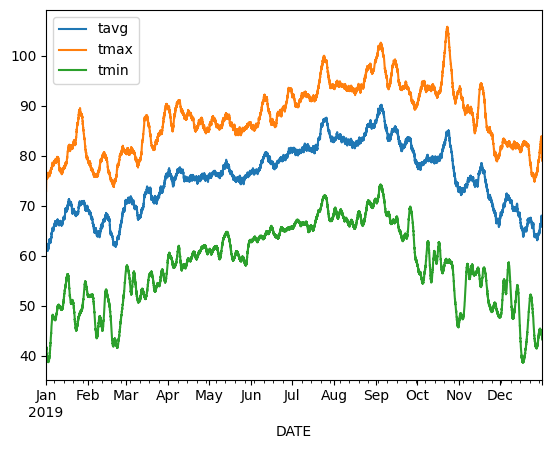

In [ ]:
inland = weather.query('station == "IN_44B4"')

#verificamos las primeras 5 filas donde efectivamente se ven solo las estaciones IN_44B4
print(inland.station.head()) 

#hacemos la gráfica
inland.plot(x='DATE')
plt.show()

Ordenamos la figura anterior agregando más argumentos a plot().

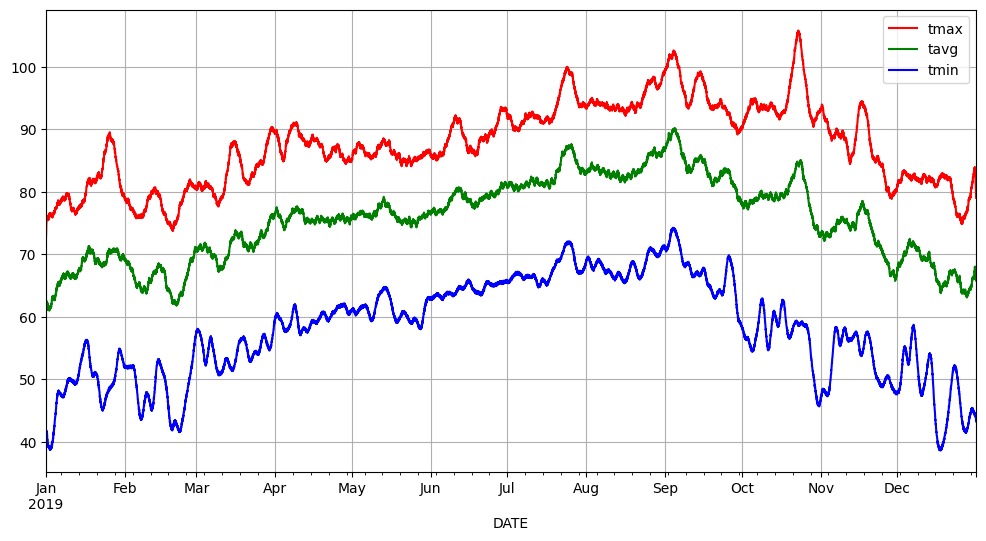

In [ ]:
inland.plot(x='DATE', y=['tmax','tavg','tmin'], color=['red','green','blue'], grid=True, figsize=(12,6))
plt.show()

Los colores ayudan a la interpretación. Rojo se asocia al calor y azul al frío

Observamos en el gráfico anterior que las líneas son muy inestables. Esto se debe a que estamos trazando datos por horas. Para crear líneas más suaves, haremos un promedio de los datos por día y volveremos a trazar.

Para hacer esto, redondearemos ``DATE`` a su valor de día, eliminando así la información de horas y minutos. Luego, creamos una tabla dinámica donde el índice sea ``DATE``.

In [ ]:
# eliminamos horas y minutos, es decir redondeamos a dias
weather['DATE'] = weather['DATE'].dt.floor('D')
#actualizamos nuestra tabla inland
inland = weather.query('station == "IN_44B4"')
#mostramos como quedaron los datos
print(inland.head())

#creamos una tabla dinámica que muestre la temperatura diaria. aggfunc='mean' por defecto
inland_tmp_daily = inland.pivot_table(index='DATE', values=['tavg', 'tmax', 'tmin']) #podemos no especificar value e igual se mostrarán las temperaturas
print(inland_tmp_daily.head())

      station       DATE   tavg   tmax   tmin
8760  IN_44B4 2019-01-01  61.14  72.93  41.31
8761  IN_44B4 2019-01-01  61.44  74.45  41.39
8762  IN_44B4 2019-01-01  61.70  74.69  41.83
8763  IN_44B4 2019-01-01  61.85  74.98  41.72
8764  IN_44B4 2019-01-01  61.84  75.36  41.51
                 tavg       tmax       tmin
DATE                                       
2019-01-01  61.735000  75.474167  40.565417
2019-01-02  61.457083  76.262500  38.997917
2019-01-03  62.805000  76.297500  40.063333
2019-01-04  63.188750  77.012083  43.549583
2019-01-05  64.929583  77.990833  47.331667


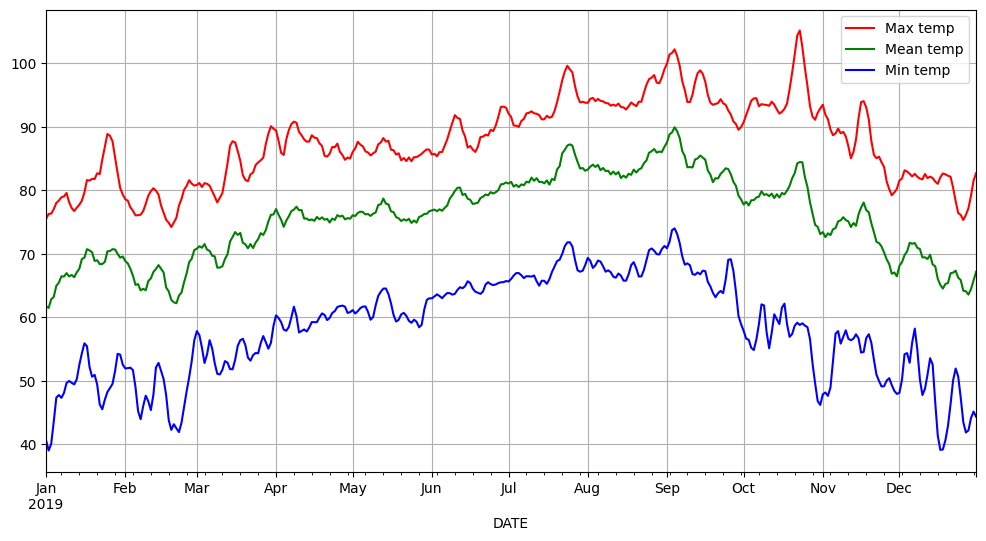

In [ ]:
#volvemos a crear el gráfico
inland_tmp_daily.plot(y=['tmax','tavg','tmin'], color=['red','green','blue'], label=['Max temp', 'Mean temp', 'Min temp'] ,grid=True, figsize=(12,6))
plt.show()

#NOTA: si hubiesemos agregado x=´DATA' no se hubiese mostrado la gráfica, esto porque en una tabla dinámica no se especifica el x. Esto lo toma
#por defecto

>## **El panorama general hasta ahora**  
>Hemos cargado los datos, hemos corregido la variable ``DATE`` y hemos graficado los datos de temperatura sin procesar para una sola estación meteorológica. De este gráfico observamos lo inestables que eran las líneas de los valores por hora por lo que suavizamos los datos trazando medias diarias (en lugar de horarias) en su lugar. Finalmente hemos formateado el gráfico, haciéndolo más fácil de interpretar.

Ahora estamos listos para incluir las otras dos estaciones.

Llegó la hora de incluir las otras estaciones meteorológicas. Podríamos decidor si viajamos o no en base a los datos de temperatura mínima y máxima, pero en esta ocasión vas a basar nuestra decisión de viaje únicamente en la temperatura media.

Para ver cómo varía la temperatura media entre las estaciones meteorológicas, representamos los datos de las tres estaciones meteorológicas en una sola figura.

station       CT_34A5    IN_44B4    MT_87AB
DATE                                       
2019-01-01  43.177083  61.735000  41.837917
2019-01-02  43.846250  61.457083  43.155417
2019-01-03  44.475000  62.805000  45.021667
2019-01-04  45.845833  63.188750  46.430417
2019-01-05  47.809167  64.929583  47.719167


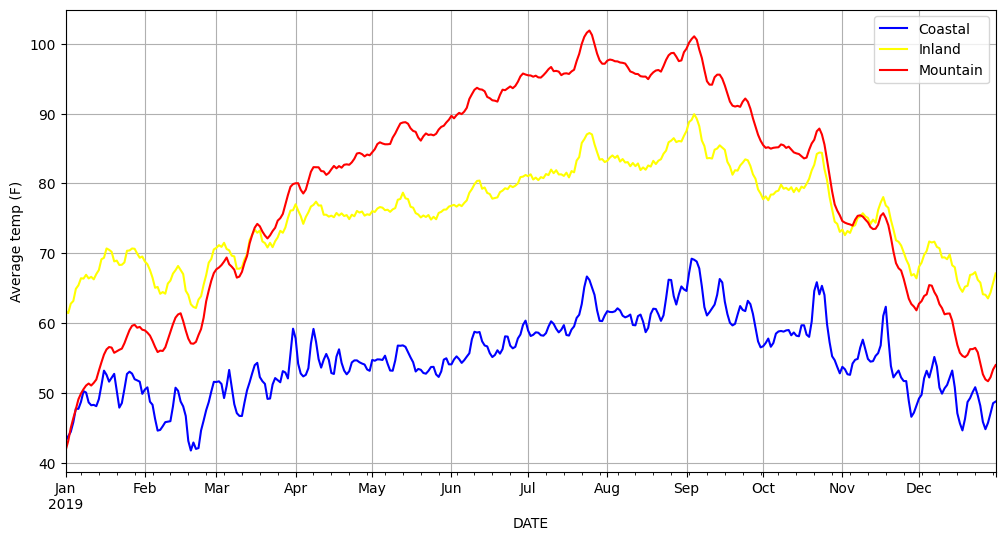

In [ ]:
## creamos una tabla de los valores diarios de temperatura media por fecha y estación
ave_tmp_daily = weather.pivot_table(index='DATE', columns='station', values='tavg')
#mostramos como quedó nuestra tabla
print(ave_tmp_daily.head())

#trazamos la gráfica
ave_tmp_daily.plot(y=['CT_34A5','IN_44B4','MT_87AB'], color=['blue','yellow','red'], label=['Coastal', 'Inland','Mountain'], grid=True, figsize=(12,6))
plt.ylabel('Average temp (F)')
plt.show()

Según el gráfico anterior, parece que hay días que cumplen con nuestra preferencia de temperatura de 55 a 85 °F. vamos a averiguar cuantos días hay entre 55 y 85 °F.

In [ ]:
tmp_max =  85
tmp_min =  55

under_condition = ave_tmp_daily.query('CT_34A5 < @tmp_max and IN_44B4 <  @tmp_max and MT_87AB <  @tmp_max')
over_condition = ave_tmp_daily.query('CT_34A5 > @tmp_min and IN_44B4 > @tmp_min and MT_87AB > @tmp_min')
between_condition = ave_tmp_daily.query('CT_34A5 < @tmp_max and IN_44B4 <  @tmp_max and MT_87AB <  @tmp_max and CT_34A5 > @tmp_min and IN_44B4 > @tmp_min and MT_87AB > @tmp_min')

print(under_condition.head())
print()
print(over_condition.head())
print()
#calculamos la longitud, es decir cuantos días tienen T° < 85, cuantos T° > 55 y y cuantos T° entre 55 y 85
print('Días en que todas las regiones están por debajo de', tmp_max, 'grados:', len(under_condition))
print('Días en que todas las regiones están por encima de', tmp_min, 'grados:', len(over_condition))
print('Días en que todas las regiones están entre',tmp_min,'y',tmp_max,'grados:', len(between_condition))

station       CT_34A5    IN_44B4    MT_87AB
DATE                                       
2019-01-01  43.177083  61.735000  41.837917
2019-01-02  43.846250  61.457083  43.155417
2019-01-03  44.475000  62.805000  45.021667
2019-01-04  45.845833  63.188750  46.430417
2019-01-05  47.809167  64.929583  47.719167

station       CT_34A5    IN_44B4    MT_87AB
DATE                                       
2019-03-30  55.642500  76.121250  79.525833
2019-03-31  59.230417  76.174583  79.911667
2019-04-01  57.854167  77.026667  80.027917
2019-04-07  57.092083  76.704583  81.685417
2019-04-08  59.201250  76.935000  82.332083

Días en que todas las regiones están por debajo de 85 grados: 198
Días en que todas las regiones están por encima de 55 grados: 171
Días en que todas las regiones están entre 55 y 85 grados: 31


``Otra forma mas eficiente de hacer la consulta anterior`` es escribir las condiciones como cadenas y colocarlas al comienzo del código para hacer referencia a ellas más adelante. Esto es muy útil cuando las condiciones lógicas cambian constantemente, así podemos ahorrar tiempo evitando la necesidad de buscar en todo el programa para encontrar y editar varias condiciones. 

Vamos a implementar esta forma más eficiente:

In [ ]:
#escribimos las condiciones como cadenas para usarlas mas adelante
under_condition = 'CT_34A5 < @tmp_max and IN_44B4 <  @tmp_max and MT_87AB <  @tmp_max'
over_condition = 'CT_34A5 > @tmp_min and IN_44B4 > @tmp_min and MT_87AB > @tmp_min'

#definimos las temperaturas
tmp_max =  85
tmp_min =  55

#ya habíamos definido esta tabla pero lo hacemos de nuevo. No es necesario definirla otra vez
ave_tmp_daily = pd.pivot_table(weather,values='tavg',index='DATE',columns='station')

#calculamos la longitud, es decir cuantos días tienen T° < 85, cuantos T° > 55 y y cuantos T° entre 55 y 85
print('Días en que todas las regiones están por debajo de', tmp_max, 'grados:', len(ave_tmp_daily.query(under_condition))) #llamamos a la condición
print('Días en que todas las regiones están por encima de', tmp_min, 'grados:', len(ave_tmp_daily.query(over_condition))) #llamamos a la condición
print('Días en que todas las regiones están entre',tmp_min,'y',tmp_max,'grados:', len(ave_tmp_daily.query(under_condition + ' and ' + over_condition)))

Días en que todas las regiones están por debajo de 85 grados: 198
Días en que todas las regiones están por encima de 55 grados: 171
Días en que todas las regiones están entre 55 y 85 grados: 31


Observamos que hay 198 dias en los que todas las regiones están por debajo de los 85 °F, 171 dias en los que todas las regiones están por encima de los 55 °F y 31 dias en que están entre 55 y 85 °F.

No hay ninguna garantía de que los 31 días identificados sean días consecutivos. Por lo que será más fácil planificar nuestro viaje si sabemos el mes que coincide con nuestra preferencia de temperatura, en lugar de los días. Entonces, en vez de trazar medias diarias, necesitamos trazar promedios mensuales. 

Para ello vamos a crear una columna que muestre solo el mes.

In [ ]:
weather['Month'] = weather.DATE.dt.month #estoy sacando solo los meses
weather.tail()

,station,DATE,tavg,tmax,tmin,Month
26275,MT_87AB,2019-12-31,53.45,67.19,32.27,12
26276,MT_87AB,2019-12-31,53.78,66.33,32.28,12
26277,MT_87AB,2019-12-31,53.41,66.46,31.86,12
26278,MT_87AB,2019-12-31,53.37,65.45,31.81,12
26279,MT_87AB,2019-12-31,53.72,64.98,31.75,12


Todo lo que queda por hacer es encontrar los meses que cumplan con nuestra preferencia de temperatura de 55-85 grados.

Para encontrar todos los meses en los que la temperatura media mensual en todas las regiones se encuentra entre 55 y 85 grados hacemos lo siguiente:

station    CT_34A5    IN_44B4    MT_87AB
Month                                   
8        61.932997  83.811438  96.844677
9        63.009653  84.177583  93.960264
10       58.900645  79.288038  83.972164
11       53.968167  73.184472  71.499472
12       49.673656  67.619140  58.549556

station    CT_34A5    IN_44B4    MT_87AB
Month                                   
10       58.900645  79.288038  83.972164


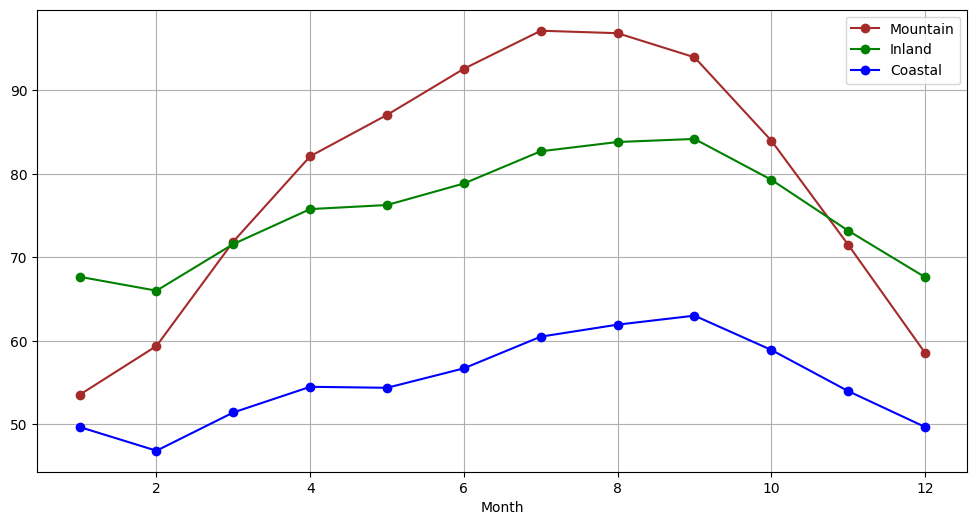

In [ ]:
#creamos una tabla dinámica
ave_temp_monthly = pd.pivot_table(weather, index='Month', columns='station', values='tavg')
#mostramos la tabla
print(ave_temp_monthly.tail())
print()

#mostramos las filas de ave_tmp_monthly que cumplen con la 55<T°<85
#recordemos que la condición lógica está definida arriba en el código anterior
print(ave_temp_monthly.query(under_condition + ' and ' + over_condition)) #es importante dejar espacio en el ' and ' sino habrá error

#graficamos
ave_temp_monthly.plot(y=['MT_87AB','IN_44B4','CT_34A5'], label=['Mountain','Inland','Coastal'], color=['brown','green','blue'], style='-o', figsize=(12,6), grid=True)
plt.show()

Observamos que solamente en el mes 10, en las tres estaciones, la T° está entre 55°F y 85°F

Por último, aplicamos un formato adicional a las figuras agregando líneas de referencia y etiquetas al gráfico.

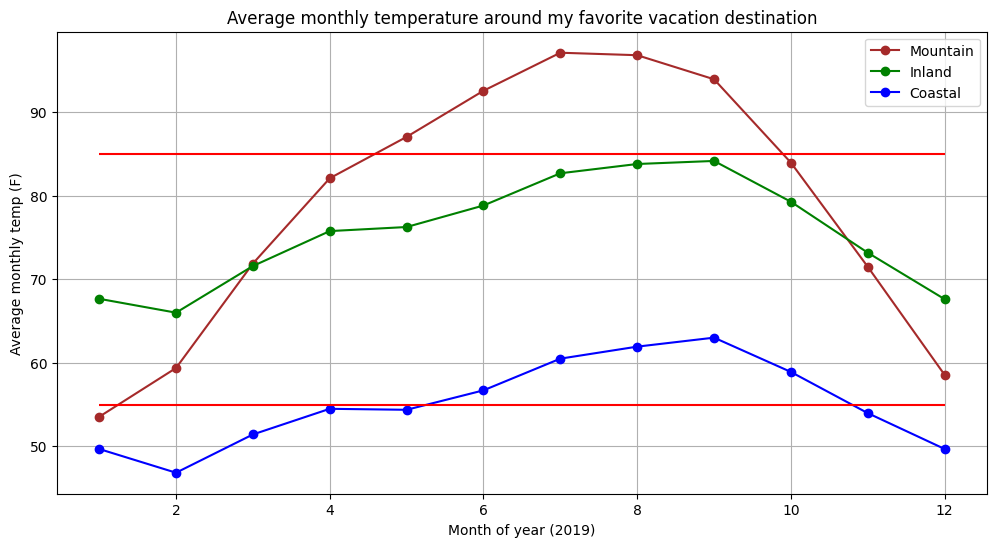

In [ ]:
ave_temp_monthly.plot(title='Average monthly temperature around my favorite vacation destination', y=['MT_87AB','IN_44B4','CT_34A5'], label=['Mountain','Inland','Coastal'], color=['brown','green','blue'], style='-o', figsize=(12,6), grid=True)
plt.ylabel('Average monthly temp (F)')
plt.xlabel('Month of year (2019)')
plt.hlines(y=[tmp_max,tmp_min], xmin=1, xmax=12, colors='red')
plt.show()

## **Todo el código se resume en:**

In [ ]:
weather = pd.read_csv('weather_data.csv')
weather['DATE'] = pd.to_datetime(weather['DATE'],format='%Y-%m-%dT%H:%S')
weather['Month'] = weather['DATE'].dt.month

under_condition = 'IN_44B4 < @tmp_max and MT_87AB < @tmp_max and CT_34A5 < @tmp_max'
over_condition = 'IN_44B4 > @tmp_min and MT_87AB > @tmp_min and CT_34A5 > @tmp_min'

tmp_max = 85
tmp_min = 55

ave_tmp_monthly = pd.pivot_table(weather,values='tavg',index='Month',columns='station')
print(ave_tmp_monthly.query(under_condition + ' and ' + over_condition))

# agrega título
ave_tmp_monthly.plot(title='Average monthly temperature around my favorite vacation destination',y=['MT_87AB','IN_44B4','CT_34A5'],style='-o',figsize=(12,6),grid=True,
                   label=['Mountain','Inland','Coastal'], color=['brown','green','blue'])

plt.ylabel('Average monthly temp (F)')
plt.xlabel('Month of year (2019)')
plt.hlines(y=[tmp_max,tmp_min], xmin=1, xmax=12, colors='red')

## **Conslusión**
Nuestro viaje tenemos que planificarlo para el mes de octubre en vista de que en este mes la temperatura se encuentra entre 55 y 85 °F.